# Bank Customer churn - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Domain Exploration
    - Understand the business domain
    - Understand the business process, identify challenges and common beleifs
    
    
2. Data Collection and Data Exploration
    - Perform generic exploration about data
    - Identofy common data quality issues
    
    
3. Data Cleaning
    - Cleaning - duplicate entries, missing values, unwanted columns and outliers
    
    
4. EDA - Exploratory Data Analytics / Root Cause Analytics
    - Data Visualization
        - Univariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
    - Statistical methods
        - Correlation Analysis
        - ANOVA
        - Chi Square test
    
    
5. Building report

## 2. Data Collection and Exploration

In [2]:
#load data
df = pd.read_csv(r"E:\Xebia\xebia_training_data\datasets\Bank_churn_modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# unwanted columns = RowNumber, CustomerId, Surname

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Note - 
        - There are chances of having outliers in age
        - Balance - more than 25% of customers seems to have 0 balance in their account


## 3. Data Cleaning

In [10]:
# check for duplicates
df.duplicated().sum()

0

In [11]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# drop unwanted columns
print(df.shape)
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
print(df.shape)

(10000, 14)
(10000, 11)


In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## 3. Exploratory Data Analytics
### Data Visualization

#### Univariate Analysis
    - Analyse one variable at a time
    - categorical - discrete frequency distribution - countplot
    - Numeric - continuous frequency distribution - histogram

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

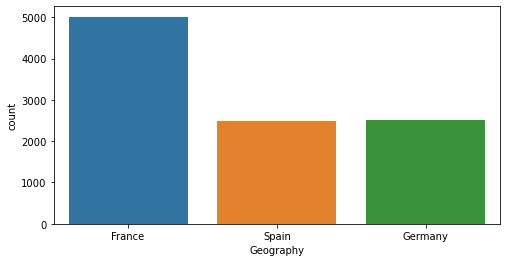

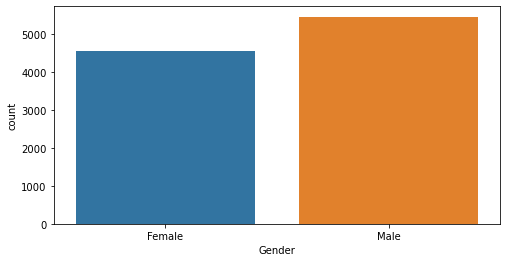

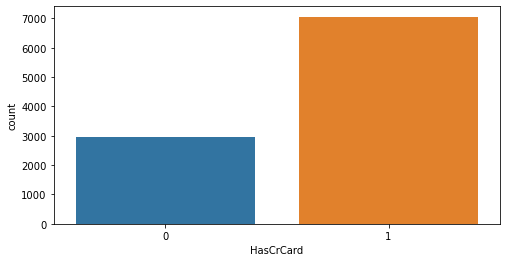

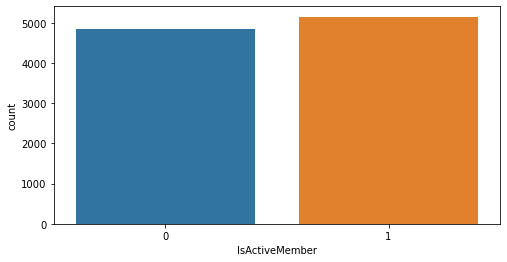

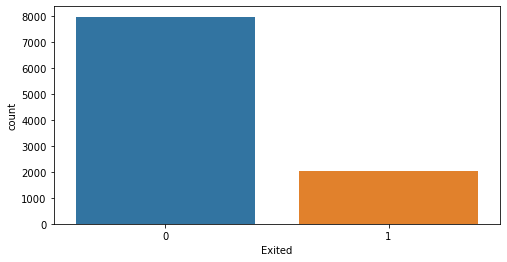

In [16]:
# Categorical data
cats = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']
for column in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(df[column])
    plt.show()

Note - 
    - Majority of customers are from France, almost 50% of customers are from france
    - total of male customers are higher compared to female customers
    - almost 70% of the customers have credit cards
    - almost 50% of the customers are not actively using their bank accounts
    - 20% of total customers left the bank
    

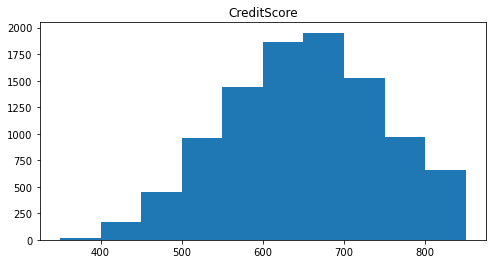

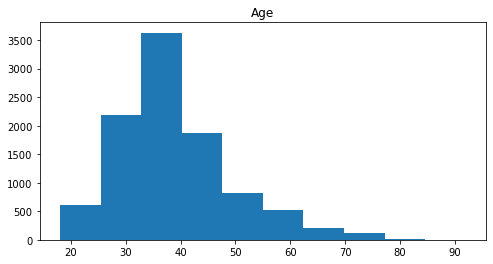

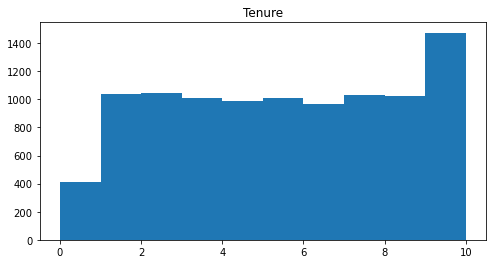

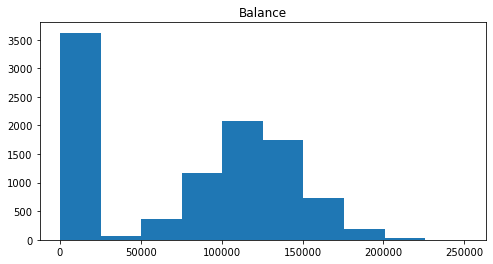

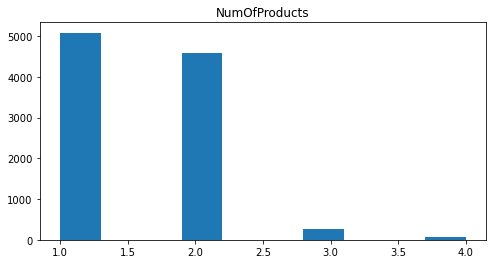

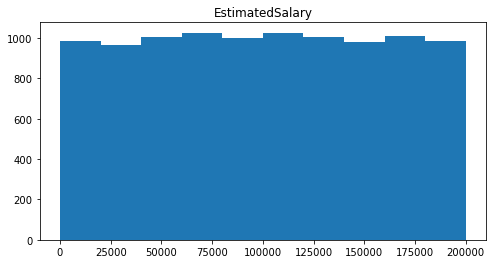

In [17]:
# Numeric
nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
for column in nums:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

Note - 
    - Most of the customers have creditscore between 500 to 800
    - Most of the customes have age between 25 to 45
    - Tenure shows almost a uniform distribution between 1 to 9
    - there are two groups, one group have almost 0 balance in their account, other group have account balance between 75k to 175k
    - Most of customers have 1 or 2 products
    - Salary has uniform distribution.
    
    
    

#### Bivariate Analysis

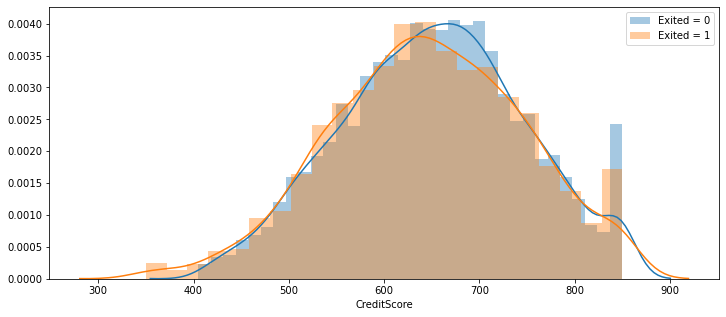

In [18]:
# numeric v/s Categorical - probability density distribution
# Careditscore v/s Exited

plt.figure(figsize=(12,5))
sns.distplot(df['CreditScore'][df.Exited==0])
sns.distplot(df['CreditScore'][df.Exited==1])
plt.legend(['Exited = 0','Exited = 1'])
plt.show()

Note - 
    As both the distributions of creditscore for exited=0 and exited=1 are almost overlapping, that means, at each value of creditscore, chances of customers leaving is almost equal to chances of customers not leaving., thus credit score has no information to say why customers left.

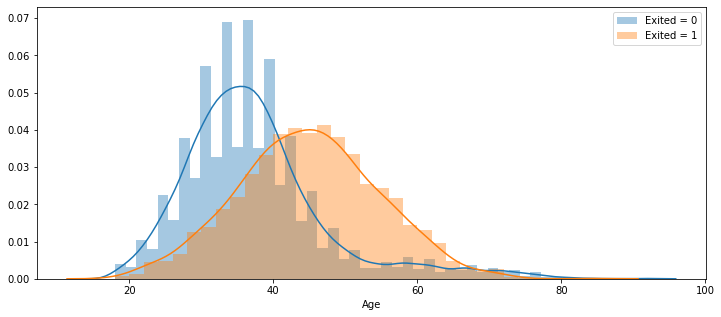

In [19]:
# numeric v/s Categorical - probability density distribution
# Age v/s Exited

plt.figure(figsize=(12,5))
sns.distplot(df['Age'][df.Exited==0])
sns.distplot(df['Age'][df.Exited==1])
plt.legend(['Exited = 0','Exited = 1'])
plt.show()

Note - 
    - For young age customers, the density of not leaving is higher, where as for old age customers density of leaving is higher.

In [20]:
# EstimatedSalary v/s Exited
# Balance v/s Exited
# Tenure v/s Exited

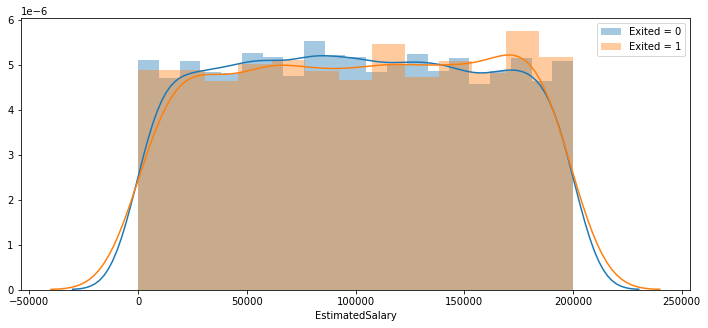

In [21]:
# numeric v/s Categorical - probability density distribution
# EstimatedSalary v/s Exited

plt.figure(figsize=(12,5))
sns.distplot(df['EstimatedSalary'][df.Exited==0])
sns.distplot(df['EstimatedSalary'][df.Exited==1])
plt.legend(['Exited = 0','Exited = 1'])
plt.show()

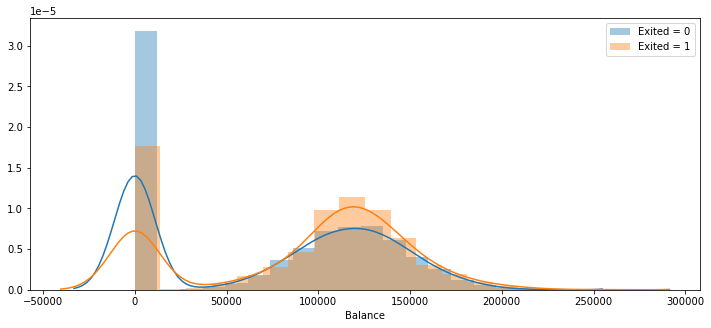

In [22]:
# numeric v/s Categorical - probability density distribution
# Balance v/s Exited

plt.figure(figsize=(12,5))
sns.distplot(df['Balance'][df.Exited==0])
sns.distplot(df['Balance'][df.Exited==1])
plt.legend(['Exited = 0','Exited = 1'])
plt.show()

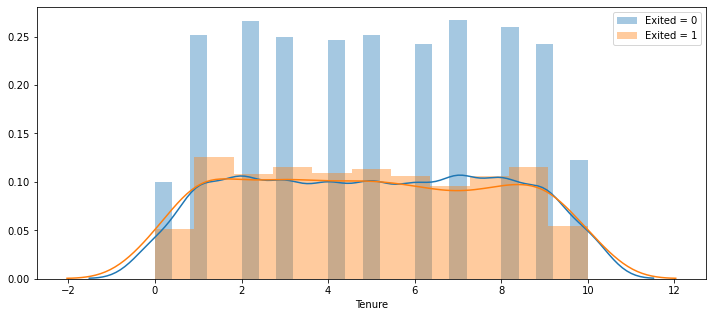

In [23]:
# numeric v/s Categorical - probability density distribution
# Tenure v/s Exited

plt.figure(figsize=(12,5))
sns.distplot(df['Tenure'][df.Exited==0])
sns.distplot(df['Tenure'][df.Exited==1])
plt.legend(['Exited = 0','Exited = 1'])
plt.show()

In [24]:
# Categorical v/s Categorical
output = pd.crosstab(df.Geography,df.Exited,margins=True)
percent = output[1]/output['All']
percent

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

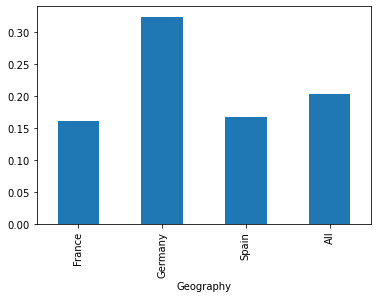

In [25]:
percent.plot(kind='bar')
plt.show()

In [26]:
# Categorical v/s Categorical
output = pd.crosstab(df.Gender,df.Exited,margins=True)
percent = output[1]/output['All']
percent

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

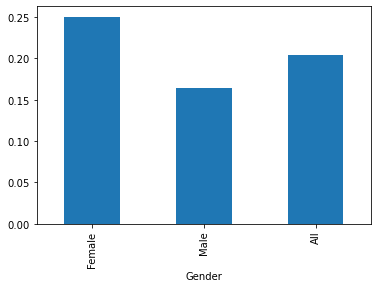

In [27]:
percent.plot(kind='bar')
plt.show()

In [28]:
# Categorical v/s Categorical
output = pd.crosstab(df.HasCrCard,df.Exited,margins=True)
percent = output[1]/output['All']
percent

HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64

In [29]:
# Categorical v/s Categorical
output = pd.crosstab(df.IsActiveMember,df.Exited,margins=True)
percent = output[1]/output['All']
percent

IsActiveMember
0      0.268509
1      0.142691
All    0.203700
dtype: float64